In [1]:
# Imports and Configuration
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

In [4]:
# Set up for non-interactive plotting
import matplotlib
matplotlib.use('Agg')
plt.switch_backend('Agg')
%matplotlib inline

In [5]:
# Apply seaborn styling
sns.set(style="whitegrid")

In [6]:
# Load Dataset
data_path = '/content/caffeine_intake_tracker.csv'
df = pd.read_csv(data_path, encoding="ascii")

In [7]:
# Quick Preview
print(df.head())

   caffeine_mg       age  focus_level  sleep_quality  sleep_impacted  \
0     0.454545  1.000000     0.715384       0.749790               1   
1     0.286364  0.833333     0.846471       0.730060               0   
2     0.531818  0.476190     0.665639       0.276600               1   
3     0.068182  0.642857     0.751364       0.654003               0   
4     0.409091  0.047619     0.808104       0.709735               1   

   beverage_coffee  beverage_energy_drink  beverage_tea  \
0             True                  False         False   
1             True                  False         False   
2            False                   True         False   
3            False                  False          True   
4             True                  False         False   

   time_of_day_afternoon  time_of_day_evening  time_of_day_morning  \
0                  False                 True                False   
1                  False                False                 True   
2 

In [8]:
# Data Summary
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   caffeine_mg            500 non-null    float64
 1   age                    500 non-null    float64
 2   focus_level            500 non-null    float64
 3   sleep_quality          500 non-null    float64
 4   sleep_impacted         500 non-null    int64  
 5   beverage_coffee        500 non-null    bool   
 6   beverage_energy_drink  500 non-null    bool   
 7   beverage_tea           500 non-null    bool   
 8   time_of_day_afternoon  500 non-null    bool   
 9   time_of_day_evening    500 non-null    bool   
 10  time_of_day_morning    500 non-null    bool   
 11  gender_female          500 non-null    bool   
 12  gender_male            500 non-null    bool   
dtypes: bool(8), float64(4), int64(1)
memory usage: 23.6 KB
None

Missing values per column:
caffeine_mg           

In [9]:
# Descriptive Statistics
num_cols = ['caffeine_mg', 'age', 'focus_level', 'sleep_quality', 'sleep_impacted']
print(df[num_cols].describe())

       caffeine_mg         age  focus_level  sleep_quality  sleep_impacted
count   500.000000  500.000000   500.000000     500.000000      500.000000
mean      0.349464    0.504048     0.825575       0.600212        0.406000
std       0.223971    0.297397     0.167635       0.233145        0.491576
min       0.000000    0.000000     0.216512       0.000000        0.000000
25%       0.177273    0.261905     0.711317       0.414782        0.000000
50%       0.290909    0.500000     0.850635       0.644141        0.000000
75%       0.518182    0.761905     1.000000       0.781867        1.000000
max       1.000000    1.000000     1.000000       1.000000        1.000000


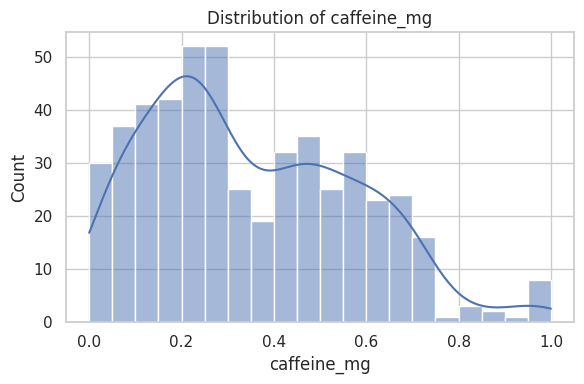

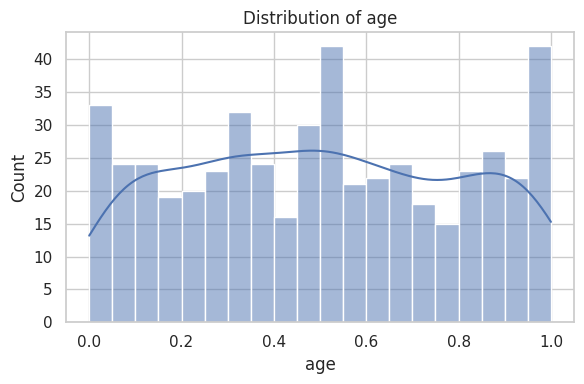

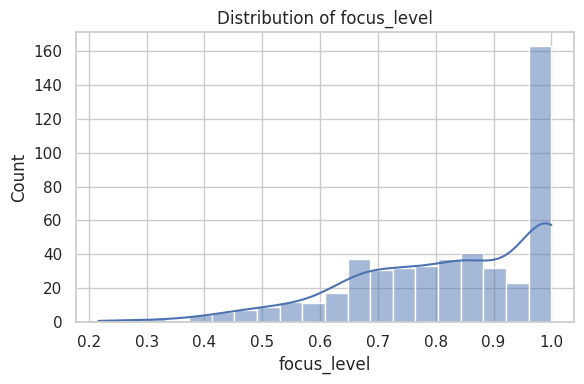

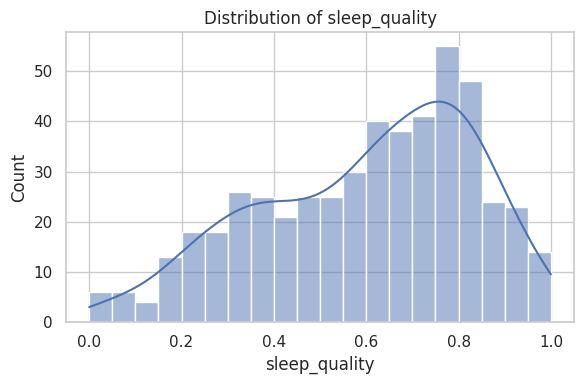

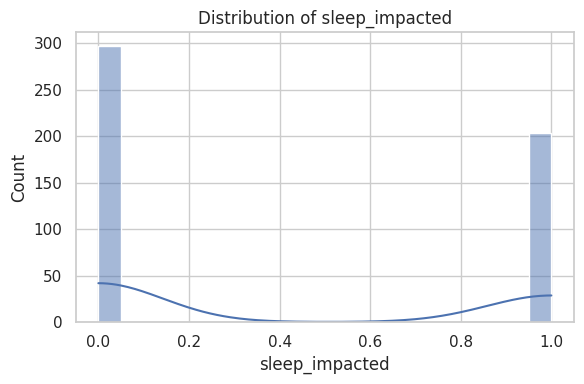

In [10]:
# Histograms for numeric columns
for column in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
    plt.show()

In [11]:
# Count plots for categorical/boolean features
bool_columns = [
    'beverage_coffee', 'beverage_energy_drink', 'beverage_tea',
    'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_morning',
    'gender_female', 'gender_male'
]

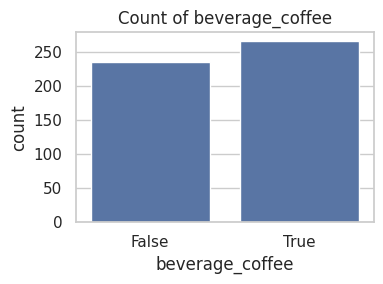

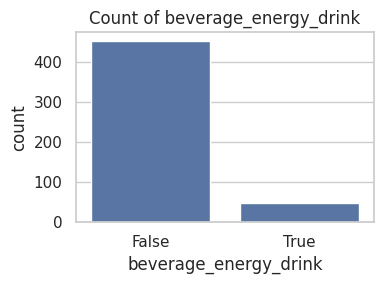

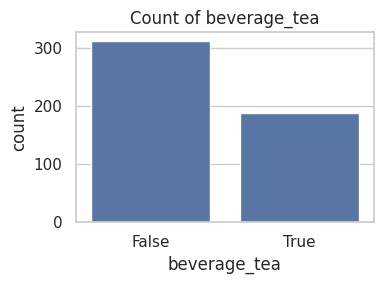

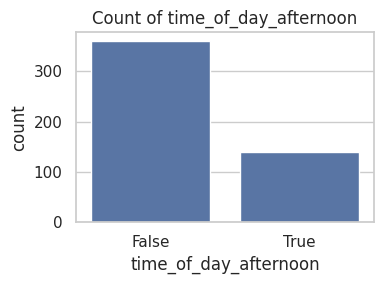

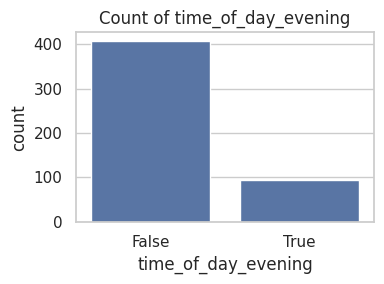

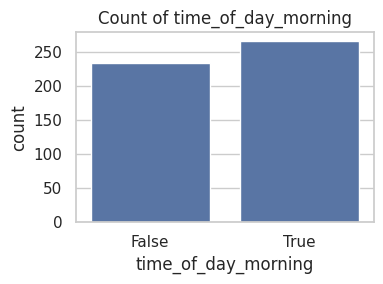

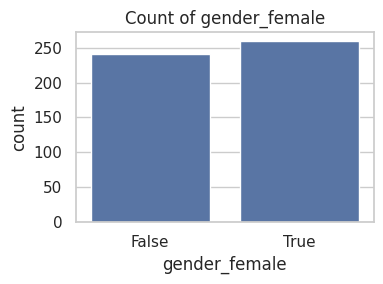

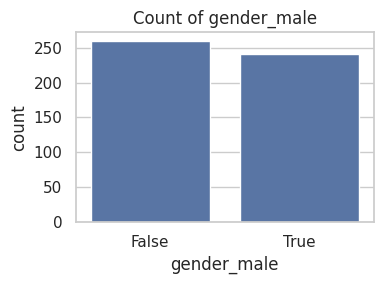

In [12]:
for column in bool_columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=df[column])
    plt.title(f"Count of {column}")
    plt.tight_layout()
    plt.show()

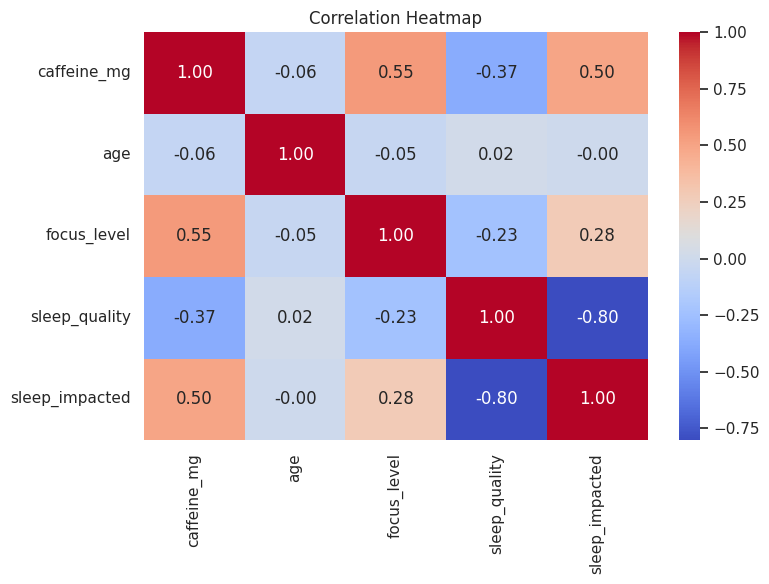

In [13]:
# Correlation Heatmap
if len(num_cols) >= 4:
    corr_matrix = df[num_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

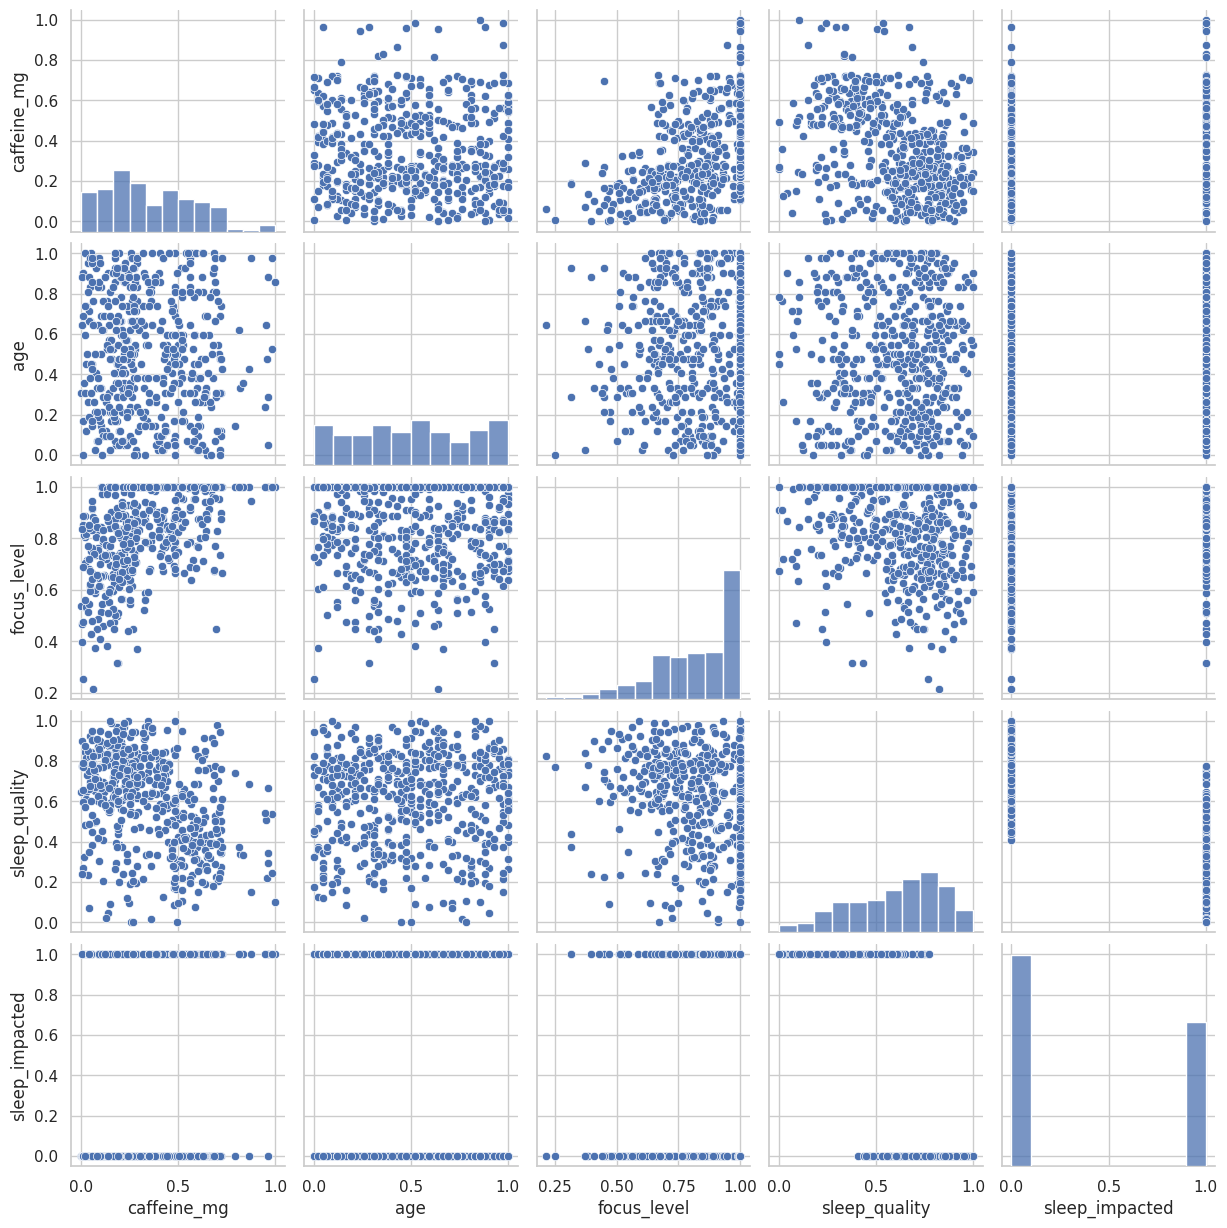

In [14]:
# Pairplot to visualize relationships
sns.pairplot(df[num_cols])
plt.show()

In [15]:
# Predictive Modeling
features = [
    'caffeine_mg', 'age', 'focus_level', 'sleep_quality',
    'beverage_coffee', 'beverage_energy_drink', 'beverage_tea',
    'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_morning',
    'gender_female', 'gender_male'
]
target = 'sleep_impacted'

In [16]:
X = df[features]
y = df[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


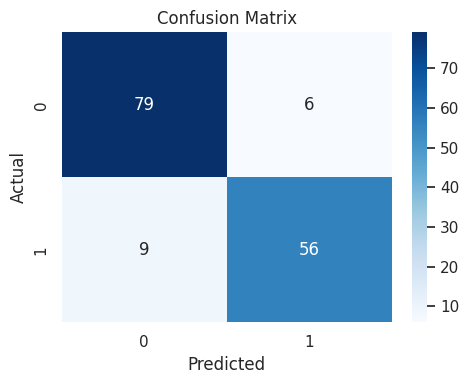

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [21]:
# ROC Curve
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

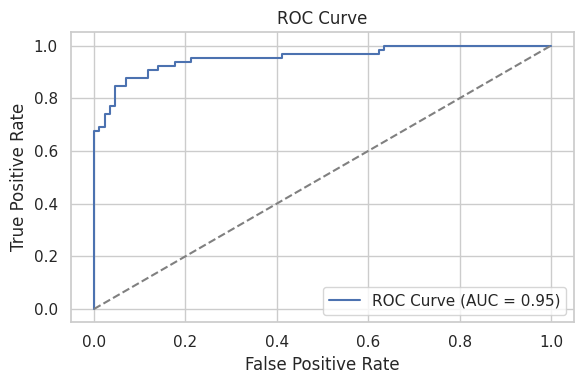

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [23]:
# Permutation Feature Importance
perm_result = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
sorted_idx = perm_result.importances_mean.argsort()

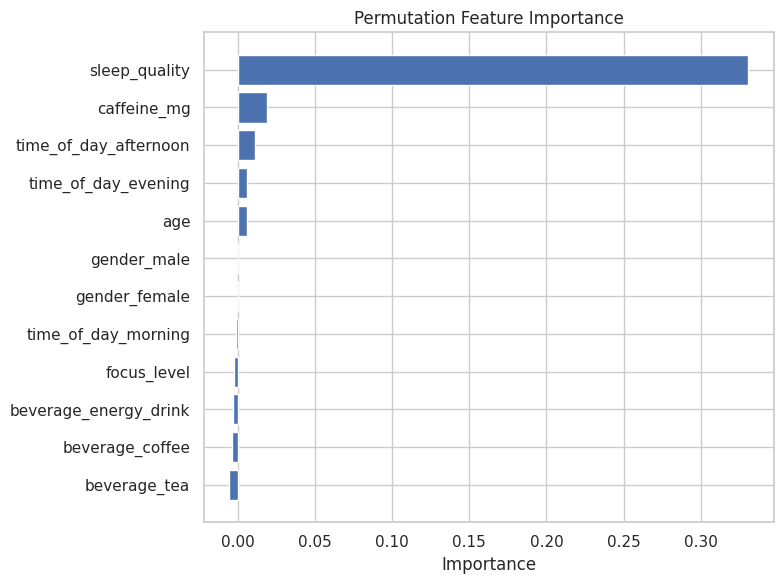

In [24]:
plt.figure(figsize=(8, 6))
plt.barh(np.array(features)[sorted_idx], perm_result.importances_mean[sorted_idx])
plt.xlabel("Importance")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()
